<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#00.-추천시스템-이해" data-toc-modified-id="00.-추천시스템-이해-0">00. 추천시스템 이해</a></span><ul class="toc-item"><li><span><a href="#1.-Apriori-알고리즘" data-toc-modified-id="1.-Apriori-알고리즘-0.1">1. Apriori 알고리즘</a></span><ul class="toc-item"><li><span><a href="#1.1-원리" data-toc-modified-id="1.1-원리-0.1.1">1.1 원리</a></span></li><li><span><a href="#1.2-Apriori-알고리즘--장단점" data-toc-modified-id="1.2-Apriori-알고리즘--장단점-0.1.2">1.2 Apriori 알고리즘 -장단점</a></span></li></ul></li><li><span><a href="#2.-FP-Growth-알고리즘" data-toc-modified-id="2.-FP-Growth-알고리즘-0.2">2. FP-Growth 알고리즘</a></span><ul class="toc-item"><li><span><a href="#2.1-원리" data-toc-modified-id="2.1-원리-0.2.1">2.1 원리</a></span></li><li><span><a href="#2.2-FP-Growth-알고리즘---장단점" data-toc-modified-id="2.2-FP-Growth-알고리즘---장단점-0.2.2">2.2 FP-Growth 알고리즘 - 장단점</a></span></li><li><span><a href="#2.3-fpgrowth에서-신뢰도나-향상도를-데이터프레임에서-확인하려면?" data-toc-modified-id="2.3-fpgrowth에서-신뢰도나-향상도를-데이터프레임에서-확인하려면?-0.2.3">2.3 fpgrowth에서 신뢰도나 향상도를 데이터프레임에서 확인하려면?</a></span></li></ul></li></ul></li><li><span><a href="#01.-컨텐츠-기반-추천" data-toc-modified-id="01.-컨텐츠-기반-추천-1">01. 컨텐츠 기반 추천</a></span><ul class="toc-item"><li><span><a href="#01.1-유사도-함수" data-toc-modified-id="01.1-유사도-함수-1.1">01.1 유사도 함수</a></span></li><li><span><a href="#1.-TF-IDF-알고리즘" data-toc-modified-id="1.-TF-IDF-알고리즘-1.2">1. TF-IDF 알고리즘</a></span><ul class="toc-item"><li><span><a href="#1.1-TF-IDF-장단점" data-toc-modified-id="1.1-TF-IDF-장단점-1.2.1">1.1 TF-IDF 장단점</a></span></li><li><span><a href="#1.2-TF-IDF를-이용한-영화-데이터-실습" data-toc-modified-id="1.2-TF-IDF를-이용한-영화-데이터-실습-1.2.2">1.2 TF-IDF를 이용한 영화 데이터 실습</a></span></li></ul></li><li><span><a href="#2.-Word2Vec" data-toc-modified-id="2.-Word2Vec-1.3">2. Word2Vec</a></span></li><li><span><a href="#01.2-콘텐츠-기반-모델---장단점" data-toc-modified-id="01.2-콘텐츠-기반-모델---장단점-1.4">01.2 콘텐츠 기반 모델 - 장단점</a></span></li></ul></li><li><span><a href="#02.-협업-필터링" data-toc-modified-id="02.-협업-필터링-2">02. 협업 필터링</a></span><ul class="toc-item"><li><span><a href="#1.-Neighborhood-based-method" data-toc-modified-id="1.-Neighborhood-based-method-2.1">1. Neighborhood based method</a></span><ul class="toc-item"><li><span><a href="#1.1-Neighborhood-based-method---KNN" data-toc-modified-id="1.1-Neighborhood-based-method---KNN-2.1.1">1.1 Neighborhood based method - KNN</a></span></li></ul></li></ul></li></ul></div>

# 00. 추천시스템 이해

## 1. Apriori 알고리즘
- 기본적인 아이디어는 '빈번한 아이템셋은 하위 아이템셋 또한 빈번할 것이다'. 즉, '빈번하지 않은 아이템셋은 하위 아이템셋 또한 빈번하지 않다'를 이용해서 아이템셋의 증가를 줄이는 방법이다.

### 1.1 원리
1. k개의 item을 가지고 단일항목집단 생성 (one-item frequent set)
2. 단일항목집단에서 최소 지지도(support)이상의 항목만 선택
3. 2에서 선택된 항목만을 대상으로 2개항목집단 생성
4. 2개항목집단에서 최소 지지도 혹은 신뢰도 이상의 항목만 선택
5. 위의 과정을 k개의 k-item-frequent set을 생성할 때까지 반복

In [2]:
import mlxtend
import numpy as np
import pandas as pd

In [3]:
data = np.array([
                 ['우유', '기저귀', '쥬스'],
                 ['양상추', '기저귀', '맥주'],
                 ['우유', '양상추', '기저귀', '맥주'],
                 ['양상추', '맥주']
])

C:\Users\woo56\anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [4]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [9]:
%%time 
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.5, use_colnames=True) # min_support : 최소 지지도

Wall time: 8.97 ms


,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(기저귀, 맥주)"
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.75,"(양상추, 맥주)"
8,0.50,"(양상추, 기저귀, 맥주)"


### 1.2 Apriori 알고리즘 -장단점
- 장점
    - 원리가 간단하여 사용자가 쉽게 이해할 수 있고 의미를 파악할 수 있다.
    - 유의한 연관성을 갖는 구매패턴을 찾아준다.
- 단점
    - 데이터가 클 경우 (item이 많은 경우)에 속도가 느리고 연산량이 많다.
    - 실제 사용시에 많은 연관상품들이 나타나는 단점들이 있다.

## 2. FP-Growth 알고리즘
- FP Growth는 이전에 언급한 Apriori의 속도측면의 단점을 개선한 알고리즘이다. Apriori와 비슷한 성능을 내지만 **FP Tree** 구조를 사용해서 빠른 속도를 가진다는게 장점이다. 하지만, 동일하게 발생하는 아이템셋(frequent itemsets)을 찾는데는 좋지만 **아이템간의 연관성**을 찾는 것은 어렵다는 단점이 있다.<br><br>
- FP Tree 구조
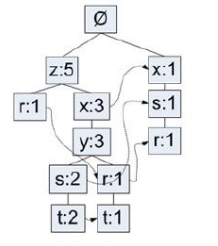

### 2.1 원리
1. 모든 거래를 확인하여, 각 아이템마다의 지지도(support)를 계산하고 최소 지지도이상의 아이템만 선택
2. 모든 거래에서 빈도가 높은 아이템 순서대로 순서를 정렬
3. 부모 노드를 중심으로 거래를 자식 노드로 추가해주면서 tree를 생성
4. 새로운 아이템이 나올 경우에는 부모 노드부터 시작하고, 그렇지 않으면 기존의 노드에서 확장
5. 위의 과정을 모든 거래에 대해 반복하여 FP TREE를 만들고 최소 지지도 이상의 패턴만을 추출

In [6]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
])

C:\Users\woo56\anaconda3\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [7]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [10]:
%%time
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.5, use_colnames=True)

Wall time: 3.99 ms


,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(기저귀, 맥주)"
5,0.50,"(기저귀, 양상추)"
6,0.50,"(양상추, 기저귀, 맥주)"
7,0.50,"(기저귀, 우유)"
8,0.75,"(양상추, 맥주)"


### 2.2 FP-Growth 알고리즘 - 장단점
1. 장점 
    - Apriori 알고리즘보다 빠르고 2번의 탐색만 필요로 함
    - 후보 Itemsets를 생성할 필요없이 진행 가능
2. 단점
    - 대용량의 데이터셋에서 메모리를 효율적으로 사용하지 않음
    - Apriori 알고리즘에 비해서 설계하기 어려움
    - 지지도의 계산이 FP-Tree가 만들어지고 나서야 가능함

### 2.3 fpgrowth에서 신뢰도나 향상도를 데이터프레임에서 확인하려면?

In [14]:
from mlxtend.frequent_patterns import association_rules

association = fpgrowth(df, min_support=0.5, use_colnames=True)
association_rules(association,
                metric = 'confidence',
                min_threshold = 0.5,
                support_only = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(기저귀),(맥주),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
1,(맥주),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
2,(기저귀),(양상추),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
3,(양상추),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
4,"(기저귀, 양상추)",(맥주),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf
5,"(맥주, 양상추)",(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
6,"(기저귀, 맥주)",(양상추),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf
7,(양상추),"(기저귀, 맥주)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50
8,(기저귀),"(맥주, 양상추)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
9,(맥주),"(기저귀, 양상추)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50


# 01. 컨텐츠 기반 추천
1. 정의
    - 컨텐츠 기반 추천 시스템은 사용자가 이전에 구매한 상품 중에서 좋아하는 상품들과 **유사한 상품**들을 추천하는 방법이다.
2. Represented Items
    - Items를 벡터 형태로 표현. 도메인에 따라 다른 방법이 적용

## 01.1 유사도 함수
1. 유클라디안 유사도 
    - 유클라디안 유사도 = 1 / (유클라디안 거리 + 1e-05)
    - 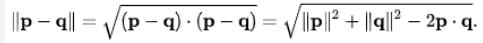
    - 장점 : 계산하기가 쉽다.
    - 단점 : p와 q의 분포가 다르거나 범위가 다른 경우에 상관성을 놓친다.

2. 코사인 유사도 
    - 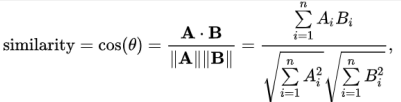
    - 장점 : 벡터의 크기가 중요하지 않은 경우에 거리를 측정하기 위한 메트릭으로 사용 (예 : 문서 내에서 단어의 빈도수 - 문서들의 길이가 고르지 않더라도 문서 내에서 얼마나 나왔는지라는 비율을 확인하기 때문에 상관없음.)
    - 단점 : 벡터의 크기가 중요한 경우에 대해서 잘 작동하지 않음.

3. 피어슨 유사도
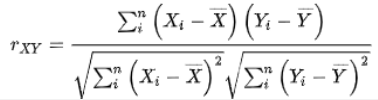

4. 자카드 유사도 
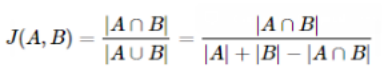

5. 그 외
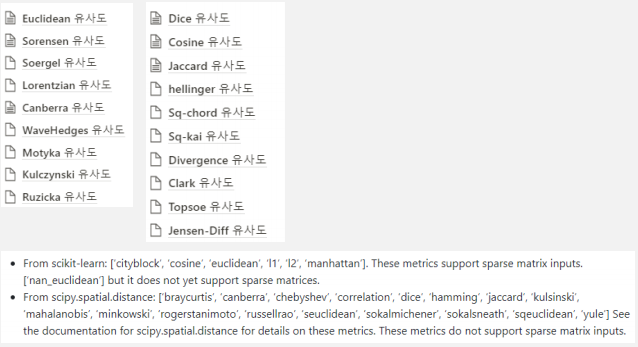

## 1. TF-IDF 알고리즘
TF-IDF는 특정 문서 내에서 특정 단어가 얼마나 자주 등장하는지를 의미하는 **단어 빈도(TF)**와 전체 문서에서 특정 단어가 얼마나 자주 등장하는지를 의미하는 역문서 빈도(DF)를 통해서 "다른 문서에서는 등장하지 않지만 특정 문서에서만 자주 등항하는 단어"를 찾아서 문서 내 단어의 가중치를 계산하는 방법이다.<br><br>
용도로는 문서의 핵심어를 추출, 문서들 사이의 유사도를 계산, 검색 결과의 중요도를 정하는 작업 등에 활용할 수 있다.

1. TF(d, t)
    - 특정 문서 d에서의 특정 단어 t의 등장 횟수
    
2. DF(t)
    - 특정 단어 t가 등장한 문서의 수

3. IDF(d, t)
    - DF(t)에 반비례하는 수
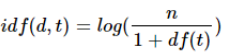
    
> **<p style="font-size:16px">$TF(d, t) * IDF(d, t) = TF-IDF(d, t)$</p>**

**<p style="font-size:20px">TF-IDF를 사용하는 이유</p>**  
> <p style="font-size:15px">{I like this movie. I love this movie. It was the best movie I've ever seen.}<br>  
{I don't like this movie. This is the worst movie I've ever seen.}</p>

1. Item이라는 컨텐츠를 벡터로 "Feature Extract" 과정을 수행해준다.
2. 빈도 수를 기반으로 많이 나오는 중요한 단어들을 잡아준다. 이러한 방법을 Counter Vectorizer 라고 한다.
3. 하지만, Couter Vectorizer는 단순 빈도만을 계산하기에 조사, 관사처럼 의미는 없지만 문장에 많이 등장하는 단어들도 높게 쳐주는 한계가 있다. 이러한 단어들에는 패널티를 줘서 적절하게 중요한 단어만을 잡아내는게 TF-IDF 기법이다.

In [15]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

In [16]:
docs

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer()

In [19]:
# 문장을 Counter Vectorizer 형태로 변환
countvect = vect.fit_transform(docs) 
countvect  # 4 X 9 : 4개의 문서에 9개의 단어

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [20]:
# toarray()를 통해서 문자이 Vector 형태의 값을 얻을 수 있음.
# 하지만, 각 인덱스와 컬럼이 무엇을 의미하는지에 대해서는 알 수가 없음
# sparse matrix -> numpy
countvect.toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [22]:
vect.vocabulary_

{'먹고': 3,
 '싶은': 6,
 '사과': 5,
 '바나나': 4,
 '길고': 1,
 '노란': 2,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [23]:
sorted(vect.vocabulary_)

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [24]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = ['문서1', '문서2', '문서3', '문서4']
countvect_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0,0,0,1,0,1,1,0,0
문서2,0,0,0,1,1,0,1,0,0
문서3,0,1,1,0,2,0,0,0,0
문서4,1,0,0,0,0,0,0,1,1


In [25]:
# 위의 DataFrame 형태의 유사도를 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

array([[1.        , 0.66666667, 0.        , 0.        ],
       [0.66666667, 1.        , 0.47140452, 0.        ],
       [0.        , 0.47140452, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

0번 문서는 1번과 유사하다는 결론을 얻을 수 있음. 동일한 방식으로 TF-IDF를 수행하면 다음과 같다.

In [26]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(docs)
tfvect

TfidfVectorizer()

In [27]:
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3', '문서4']
tfidv_df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
문서1,0.00000,0.00000,0.00000,0.526405,0.00000,0.667679,0.526405,0.00000,0.00000
문서2,0.00000,0.00000,0.00000,0.577350,0.57735,0.000000,0.577350,0.00000,0.00000
문서3,0.00000,0.47212,0.47212,0.000000,0.74445,0.000000,0.000000,0.00000,0.00000
문서4,0.57735,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.57735,0.57735


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.60784064, 0.        , 0.        ],
       [0.60784064, 1.        , 0.42980824, 0.        ],
       [0.        , 0.42980824, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

### 1.1 TF-IDF 장단점
1. 장점 
    - 직관적인 해석이 가능하다.
   
2. 단점
    - 대규모 말뭉치를 다룰 때 메모리상의 문제가 발생
        - 높은 차원을 가짐
        - 매우 sparse한 형태의 데이터임
        - 예) 100만개의 문서를 다루는 경우 : 100만개의 문서에 등장한 모든 단어를 추출해야하고 이때 단어의 수는 1문서당 새로운 단어가 10개면, 1000만개 정도의 말뭉치가 형성됨. 즉, 100만 X 1000만의 매트릭스가 형성

### 1.2 TF-IDF를 이용한 영화 데이터 실습

In [40]:
data = pd.read_csv('./dataset/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [41]:
data['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [42]:
# overview의 항목 추출
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [43]:
# 전처리
# overview의 결측치가 있는 항목은 모두 제거
data =data[data['overview'].notnull()].reset_index(drop=True)
data.shape

(44512, 24)

In [45]:
data = data.loc[0:20000].reset_index(drop=True)

In [47]:
# 불용어 : 유의미하지 않은 단어 토큰을 제거
# https://wikidocs.net/22530
tfidf = TfidfVectorizer(stop_words='english')

# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20001, 47665)


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [52]:
cosine_matrix.shape

(20001, 20001)

In [53]:
np.round(cosine_matrix, 4)

array([[1.    , 0.0158, 0.    , ..., 0.0083, 0.0172, 0.    ],
       [0.0158, 1.    , 0.0492, ..., 0.0057, 0.008 , 0.    ],
       [0.    , 0.0492, 1.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.0083, 0.0057, 0.    , ..., 1.    , 0.0144, 0.    ],
       [0.0172, 0.008 , 0.    , ..., 0.0144, 1.    , 0.0183],
       [0.    , 0.    , 0.    , ..., 0.    , 0.0183, 1.    ]])

In [54]:
# cosine_matrix
# 인덱스 0 -> 1 -> 2 .. -> 20001
# 0 인덱스 : 0번째 id 영화

In [55]:
# movie title과 id를 매핑할 dictionary를 생성해준다.
movie2id = {}
for i, c in enumerate(data['title']): movie2id[i] = c
    
# id와 movie title을 매핑할 dictionary를 생성해준다.
id2movie = {}
for i, c in movie2id.items(): id2movie[c] = i

In [56]:
movie2id

{0: 'Toy Story',
 1: 'Jumanji',
 2: 'Grumpier Old Men',
 3: 'Waiting to Exhale',
 4: 'Father of the Bride Part II',
 5: 'Heat',
 6: 'Sabrina',
 7: 'Tom and Huck',
 8: 'Sudden Death',
 9: 'GoldenEye',
 10: 'The American President',
 11: 'Dracula: Dead and Loving It',
 12: 'Balto',
 13: 'Nixon',
 14: 'Cutthroat Island',
 15: 'Casino',
 16: 'Sense and Sensibility',
 17: 'Four Rooms',
 18: 'Ace Ventura: When Nature Calls',
 19: 'Money Train',
 20: 'Get Shorty',
 21: 'Copycat',
 22: 'Assassins',
 23: 'Powder',
 24: 'Leaving Las Vegas',
 25: 'Othello',
 26: 'Now and Then',
 27: 'Persuasion',
 28: 'The City of Lost Children',
 29: 'Shanghai Triad',
 30: 'Dangerous Minds',
 31: 'Twelve Monkeys',
 32: 'Babe',
 33: 'Carrington',
 34: 'Dead Man Walking',
 35: 'Across the Sea of Time',
 36: 'It Takes Two',
 37: 'Clueless',
 38: 'Cry, the Beloved Country',
 39: 'Richard III',
 40: 'Dead Presidents',
 41: 'Restoration',
 42: 'Mortal Kombat',
 43: 'To Die For',
 44: 'How To Make An American Quilt',
 

In [57]:
id2movie

{'Toy Story': 0,
 'Jumanji': 1,
 'Grumpier Old Men': 2,
 'Waiting to Exhale': 3,
 'Father of the Bride Part II': 4,
 'Heat': 14628,
 'Sabrina': 876,
 'Tom and Huck': 7,
 'Sudden Death': 8,
 'GoldenEye': 9,
 'The American President': 10,
 'Dracula: Dead and Loving It': 11,
 'Balto': 12,
 'Nixon': 13,
 'Cutthroat Island': 14,
 'Casino': 15,
 'Sense and Sensibility': 16,
 'Four Rooms': 17,
 'Ace Ventura: When Nature Calls': 18,
 'Money Train': 19,
 'Get Shorty': 20,
 'Copycat': 21,
 'Assassins': 22,
 'Powder': 23,
 'Leaving Las Vegas': 24,
 'Othello': 15281,
 'Now and Then': 26,
 'Persuasion': 14779,
 'The City of Lost Children': 28,
 'Shanghai Triad': 29,
 'Dangerous Minds': 30,
 'Twelve Monkeys': 31,
 'Babe': 32,
 'Carrington': 33,
 'Dead Man Walking': 34,
 'Across the Sea of Time': 35,
 'It Takes Two': 36,
 'Clueless': 37,
 'Cry, the Beloved Country': 38,
 'Richard III': 17618,
 'Dead Presidents': 40,
 'Restoration': 41,
 'Mortal Kombat': 42,
 'To Die For': 43,
 'How To Make An America

In [58]:
idx = id2movie['Toy Story'] # Toy Story : 0번 인덱스
idx

0

In [59]:
# Toy Story의 id 추출
idx = id2movie['Toy Story']
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] # 자기 자신을 제외한 영화들의 유사도 및 인덱스를 추출
sim_scores

[(1, 0.01577499623706559),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.041138683296865486),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0099121496903153),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.01978034381431984),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.006321775635368981),
 (42, 0.0),
 (43, 0.0),
 (44, 0.009292791126667362),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.013838678611953216),
 (49, 0.009852367947354567),
 (50, 0.010928162091485132),
 (51, 0.0),
 (52, 0.0),
 (53, 0.02000467244181858),
 (54, 0.0),
 (55, 0.025263801435198463),
 (56, 0.02072192444202655),
 (57, 0.0),
 (58, 0.03420184247473588),
 (59, 0.0),
 (60, 0.0),
 (61, 0.00860353886947865),
 (62, 0.0),
 (63, 0.01019819462957017),
 (64, 0

In [60]:
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # 유사도가 높은 순서대로 정렬
sim_scores[0:10] # 상위 10개의 인덱스와 유사도를 추출

[(15282, 0.5262275451171008),
 (2979, 0.463276799830381),
 (10271, 0.2797390476075632),
 (8303, 0.20078538664316947),
 (1058, 0.18287334034120212),
 (11367, 0.15712074193481165),
 (1916, 0.15288512626542436),
 (3039, 0.1433450408051554),
 (483, 0.13765225108436677),
 (11573, 0.1337032693869044)]

Toy Story overview를 기준으로 TF-IDF 정렬한 결과

In [61]:
sim_scores = [(movie2id[i], score) for i, score in sim_scores[0:10]]
sim_scores

[('Toy Story 3', 0.5262275451171008),
 ('Toy Story 2', 0.463276799830381),
 ('The 40 Year Old Virgin', 0.2797390476075632),
 ('The Champ', 0.20078538664316947),
 ('Rebel Without a Cause', 0.18287334034120212),
 ('For Your Consideration', 0.15712074193481165),
 ('Condorman', 0.15288512626542436),
 ('Man on the Moon', 0.1433450408051554),
 ('Malice', 0.13765225108436677),
 ('Factory Girl', 0.1337032693869044)]

## 2. Word2Vec
1. 등장배경
    - 대규모 말뭉치를 다룰 때 메모리상의 문제가 발생
    - 한 번에 학습 데이터 전체를 진행함
    - 학습을 통해서 개선하기가 어려움<br><br>

2. 정의
    - Word2Vec은 단어간 유사도를 반영하여 단어를 벡터로 바꿔주는 임베딩 방법론이다. 원-핫벡터 형태의 sparse matrix가 가지는 단점을 해소하고자 저차원의 공간에 벡터로 매핑하는 것이 특징이다. Word2Vec은 "비슷한 위치에 등장하는 단어들은 비슷한 의미를 가진다"라는 가정을 통해서 학습을 진행한다. 저차원에 학습된 단어의 의미를 분산하여 표현하기에 단어 간 유사도를 계산할 수 있다.<br><br>
    - 추천 시스템에서는 단어를 구매 상품으로 바꿔서 구매한 패턴에 Word2Vec을 적용해서 비슷한 상품을 찾을 수 있다.<br><br>
    
3. 특징
    - 추론 기반의 방법
    - 추론 : **주변 단어(맥락)**이 주어졌을 때 "?"에 무슨 단어(중심단어)가 들어가는지를 추측하는 작업
    - 잘못 예측한 경우 학습을 통해서 점점 모델을 개선

**<p style="font-size:20px">Word2Vec - CBOW</p><br>**
CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법이다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법이다.

> 예) you say goodbye and I say hello.

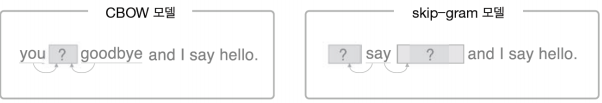
- 주변 단어 : 주변에 있는 단어 (you, goodbye)
- 중심 단어 : 중간에 있는 단어 (say)
- 윈도우 크기 : 주변을 몇 칸까지 볼 지에 대한 크기 (1)

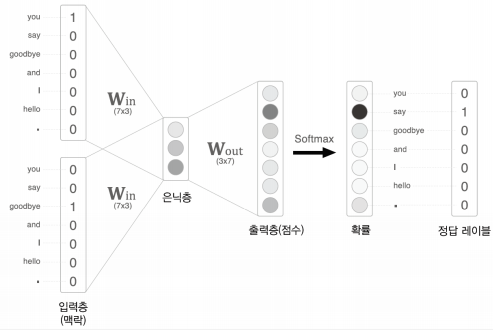

In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [64]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [66]:
movie = pd.read_csv('./dataset/ratings.csv', low_memory=False)
movie.head(2)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435


In [67]:
# 시간순으로 정렬해주는 함수 sort_values 사용
movie = movie.sort_values(by='timestamp', ascending=True).reset_index(drop=True)
movie.head()

,userId,movieId,rating,timestamp
0,38150,1176,4.0,789652004
1,44717,1079,3.0,789652009
2,44717,47,5.0,789652009
3,44717,21,3.0,789652009
4,190860,21,5.0,822873600


In [68]:
# 영화의 Metadata를 불러와서 movieId에 맞는 title을 구해준다.
meta = pd.read_csv('./dataset/movies_metadata.csv', low_memory=False)
meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [69]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [70]:
meta = meta.rename(columns = {'id' : 'movieId'}) # 컬럼명 변경
movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], how='left', on='movieId') # 조인

In [71]:
movie.head()

,userId,movieId,rating,timestamp,original_title
0,38150,1176,4.0,789652004,NaN
1,44717,1079,3.0,789652009,NaN
2,44717,47,5.0,789652009,NaN
3,44717,21,3.0,789652009,The Endless Summer
4,190860,21,5.0,822873600,The Endless Summer


In [72]:
movie = movie[movie['original_title'].notnull()].reset_index(drop=True)

In [73]:
agg = movie.groupby(['userId'])['original_title'].agg({'unique'})
agg.head()

,unique
userId,
1,"[Young and Innocent, Shuang ma lian huan, Cesa..."
2,"[La passion de Jeanne d'Arc, La belle et la bê..."
3,"[I Love You to Death, Once Were Warriors, Mons..."
4,"[Muxmäuschenstill, Batman & Robin, Hidalgo, 12..."
5,"[Star Trek III: The Search for Spock, The Curs..."


In [74]:
movie['original_title'].unique()

array(['The Endless Summer', 'Apocalypse Now', 'Finding Nemo', ...,
       'Lost River', 'Friends & Lovers', 'The Chechahcos'], dtype=object)

Wrod2Vec 적용

In [75]:
# int 형식은 Word2Vec에서 학습이 안되어서 String으로 변경해준다.
sentence = []
for user_sentence in agg['unique'].values:
    # map -> list 내의 모든 원소에 대해서 string으로 변환
    sentence.append(list(map(str, user_sentence)))

In [76]:
sentence

[['Young and Innocent',
  'Shuang ma lian huan',
  'Cesare deve morire',
  'Sleepless in Seattle',
  'Trois couleurs : Rouge',
  'Rocky Balboa',
  'License to Wed',
  'Confession of a Child of the Century',
  'Fools Rush In',
  'Shriek If You Know What I Did Last Friday the Thirteenth',
  'Les Quatre Cents Coups'],
 ["La passion de Jeanne d'Arc",
  'La belle et la bête',
  'Donnie Darko',
  'Jarhead',
  'Four Rooms',
  'The 39 Steps',
  'Almost Famous',
  'Mrs. Doubtfire',
  '英雄',
  'Monty Python and the Holy Grail',
  'Interview with the Vampire',
  "Pirates of the Caribbean: Dead Man's Chest",
  'Hable con ella',
  'The Matrix Revolutions',
  'Parenthood',
  'A Nightmare on Elm Street',
  'Night on Earth'],
 ['I Love You to Death',
  'Once Were Warriors',
  'Monsoon Wedding',
  'Reservoir Dogs',
  'Sleepless in Seattle',
  'The Third Man',
  'My Super Ex-Girlfriend',
  'Fools Rush In'],
 ['Muxmäuschenstill',
  'Batman & Robin',
  'Hidalgo',
  '12 + 1',
  'Tuya de hun shi',
  'Reign O

In [78]:
from gensim.models import Word2Vec

embedding_model = Word2Vec(sentence, size=20, window=5,
                          min_count=1, workers=4, iter=200, sg=1)  # sg : 0 - CBOW / sg : 1 - SKIP-GRAM

In [79]:
embedding_model.wv.most_similar(positive=['Spider-Man 2'], topn=10)

[('The Flintstones', 0.9248380064964294),
 ('Solaris', 0.9204844832420349),
 ('To Die For', 0.914644718170166),
 ('Chill Factor', 0.9123724102973938),
 ('Lammbock', 0.9017930626869202),
 ('Domicile Conjugal', 0.888543963432312),
 ('Flatliners', 0.8794776201248169),
 ('Les Poupées Russes', 0.8769959807395935),
 ('Forrest Gump', 0.866874098777771),
 ('Land of Plenty', 0.859130859375)]

## 01.2 콘텐츠 기반 모델 - 장단점
1. 장점
    - 협업 필터링은 다른 사용자들의 평점이 필요한 반면에, 자신의 평점만을 가지고 추천 시스템을 만들 수 있음.
    - item의 feature를 통해서 추천을 하기에 추천이 된 이유를 설명하기에 용이함
    - 사용자가 평점을 매기지 않은 새로운 item이 들어올 경우에도 추천이 가능함<br><br>
    
2. 단점
    - item의 feature을 추출해야 하고 이를 통해서 추천하기 때문에 제대로 feature를 추출하지 못하면 정확도가 낮음. 그렇기에 Domain Knowleadge가 분석시에 필요할 수도 있음
    - 기존의 item과 유사한 item 위주로만 추천하기에 새로운 장르의 item을 추천하기 어려움
    - 새로운 사용자에 대해서 충분한 평점이 쌓이기 전까지는 추천하기 힘듦

# 02. 협업 필터링
1. 정의 
    - 협업 필터링은 사용자의 구매 패턴이나 평점을 가지고 다른 사람들의 구매 패턴, 평점을 통해서 추천을 하는 방법이다. 추가적인 사용자의 개인 정보나 아이템의 정보가 없이도 추천할 수 있는게 큰 장점이며 2006년부터 2009년까지 열린 Netflix Prize Competition에서 우승한 알고리즘으로 유명세를 떨쳤다.<br><br>
    
2. 종류
    1. 최근접 이웃기반
    2. 잠재 요인기반

## 1. Neighborhood based method
1. 정의 
    - Neighborhood based Collaborative Filtering은 메모리 기반 알고리즘으로 협업 필터링을 위해 개발된 초기 알고리즘이다.<br><br>
    
2. 알고리즘
    1. User-based collaborative filtering
        - 사용자의 구매 패턴(평점)과 유사한 사용자를 찾아서 추천 리스트 생성
    2. Item-based collaborative filtering
        - 특정 사용자가 준 점수간의 유사한 상품을 찾아서 추천 리스트 생성

### 1.1 Neighborhood based method - KNN
1. K Nearest Neighbors<br>
가장 근접한 K명의 Neighbors를 통해서 예측하는 방법
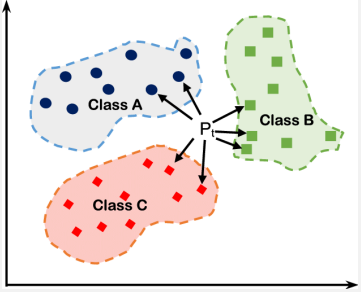

2. 데이터<br>
유저가 자신의 선호도를 직접 표현한 데이터
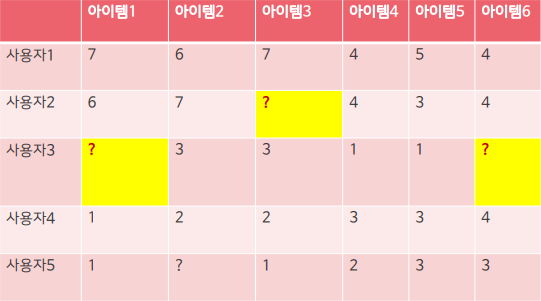

3. User Based Collaborative Filtering<br>
유저가 자신의 선호도를 집적적으로 표현한 데이터
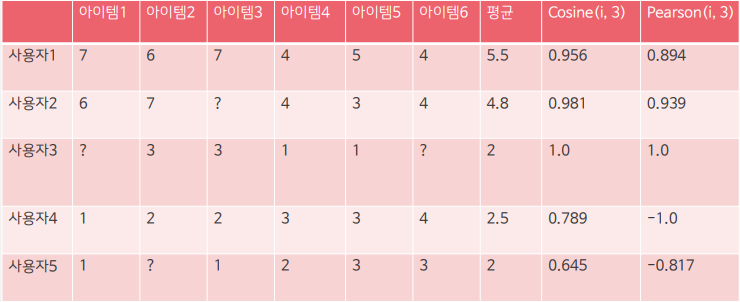